In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Cleaning outliers

The cars dudes have this problem, maybe you do too?

In [2]:
cars = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv')
cars

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,13,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX-L,Honda,2012 Honda Pilot,2012,250,253
5072,141,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo Coupe LP 560-4,Lamborghini,2012 Lamborghini Gallardo Coup,2012,552,398
5073,160,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo LP 560-4 Spyder,Lamborghini,2012 Lamborghini Gallardo Spyder,2012,552,398
5074,200,210,110,Rear-wheel drive,BMW 3.0L 6 cylinder 315hp 330 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,17,Gasoline,25,Automatic transmission,2012 BMW 740i Sedan,BMW,2012 BMW 7 Series,2012,315,330


In [3]:
cars.max()

Dimensions.Height                                                                                255
Dimensions.Length                                                                                255
Dimensions.Width                                                                                 254
Engine Information.Driveline                                                        Rear-wheel drive
Engine Information.Engine Type                     infiniti 3.5L 6 Cylinder 302 hp 258 ft-lbs Hybrid
Engine Information.Hybrid                                                                       True
Engine Information.Number of Forward Gears                                                         8
Engine Information.Transmission                                       8 Speed Automatic Select Shift
Fuel Information.City mpg                                                                         38
Fuel Information.Fuel Type                                                                 

Max highway mpg 223 !?!?!? That's gotta be a mistake. Here's how to find it...

In [4]:
cars[ cars['Fuel Information.Highway mpg'] > 100 ]

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
3686,82,207,240,Rear-wheel drive,Chevrolet 6.0L 8 Cylinder 332 hp 367 ft-lbs Hy...,True,4,4 Speed Automatic,20,Gasoline,223,Automatic transmission,2011 Chevrolet Silverado 1500 Hybrid 1HY,Chevrolet,2011 Chevrolet Silverado 1500 Hybrid,2011,332,367


...and fix it. Using that index right there and the column name, we can reach in and replace it with a reasonable value:

In [5]:
cars.at[3686, 'Fuel Information.Highway mpg'] = 23
cars['Fuel Information.Highway mpg'].describe()

count    5076.000000
mean       24.086091
std         5.856904
min        11.000000
25%        20.000000
50%        24.000000
75%        28.000000
max        43.000000
Name: Fuel Information.Highway mpg, dtype: float64

But what if there's still a problem in another column? The standard way to deal with everything at once is using 1.5xIQR (Inter-Quartile-Range -- remember the placement of the boxplot whiskers?). As [this stackoverflow answer](https://stackoverflow.com/questions/35827863/remove-outliers-in-pandas-dataframe-using-percentiles) says, 'Use this code and don't waste your time':

In [6]:
# Start over with the outlier in again
cars = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv')
Q1 = cars.quantile(0.25)
Q3 = cars.quantile(0.75)
IQR = Q3-Q1
outliers = cars[ ((cars < (Q1 - 1.5 * IQR)) | (cars > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
14,226,243,201,All-wheel drive,BMW 4.4L 8 cylinder 555hp 500 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,12,Gasoline,17,Automatic transmission,2010 BMW X5 M SUV,BMW,2010 BMW X5,2010,555,500
15,226,243,201,All-wheel drive,BMW 4.4L 8 cylinder 555hp 500 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,12,Gasoline,17,Automatic transmission,2011 BMW X5 M SUV,BMW,2011 BMW X5,2011,555,500
16,148,12,191,All-wheel drive,BMW 4.4L 8 cylinder 555hp 500 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,12,Gasoline,17,Automatic transmission,2010 BMW X6 M,BMW,2010 BMW X6,2010,555,500
17,148,12,191,All-wheel drive,BMW 4.4L 8 cylinder 555hp 500 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,12,Gasoline,17,Automatic transmission,2011 BMW X6 M,BMW,2011 BMW X6,2011,555,500
48,193,34,107,Rear-wheel drive,Bentley 6.8L 8 cylinder 530hp 774 ft-lbs Turbo,True,6,6 Speed Automatic,9,Gasoline,15,Automatic transmission,2010 Bentley Brooklands,Bentley,2010 Bentley Brooklands,2010,530,774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5051,241,199,134,Rear-wheel drive,Bentley 6.8L 8 Cylinder 505 hp 752 ft-lbs Turbo,True,8,8 Speed Automatic Select Shift,11,Gasoline,18,Automatic transmission,2012 Bentley Mulsanne,Bentley,2012 Bentley Mulsanne,2012,505,752
5056,114,239,203,Front-wheel drive,Honda 1.5L 4 Cylinder 122hp 128lb-ft Hybrid,True,6,6 Speed Manual,31,Gasoline,37,Manual transmission,2012 Honda CR-Z EX,Honda,2012 Honda CR-Z,2012,122,128
5057,114,239,203,Front-wheel drive,Honda 1.5L 4 Cylinder 122hp 128lb-ft Hybrid,True,6,6 Speed Manual,31,Gasoline,37,Manual transmission,2012 Honda CR-Z,Honda,2012 Honda CR-Z,2012,122,128
5072,141,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo Coupe LP 560-4,Lamborghini,2012 Lamborghini Gallardo Coup,2012,552,398


In [7]:
outliers.max()

Dimensions.Height                                                                           252
Dimensions.Length                                                                           251
Dimensions.Width                                                                            249
Engine Information.Driveline                                                   Rear-wheel drive
Engine Information.Engine Type                     Volkswagen 3.6L 6 Cylinder 280 hp 265 ft-lbs
Engine Information.Hybrid                                                                  True
Engine Information.Number of Forward Gears                                                    8
Engine Information.Transmission                                  8 Speed Automatic Select Shift
Fuel Information.City mpg                                                                    38
Fuel Information.Fuel Type                                                             Gasoline
Fuel Information.Highway mpg            

In [8]:
# Here's where we strip cars of outliers. Same as before except add a tilde ~
cars     = cars[~((cars < (Q1 - 2 * IQR)) | (cars > (Q3 + 2 * IQR))).any(axis=1)]
cars.max()

Dimensions.Height                                                                                255
Dimensions.Length                                                                                255
Dimensions.Width                                                                                 254
Engine Information.Driveline                                                        Rear-wheel drive
Engine Information.Engine Type                     infiniti 3.5L 6 Cylinder 302 hp 258 ft-lbs Hybrid
Engine Information.Hybrid                                                                       True
Engine Information.Number of Forward Gears                                                         8
Engine Information.Transmission                                       8 Speed Automatic Select Shift
Fuel Information.City mpg                                                                         31
Fuel Information.Fuel Type                                                                 

This kind of thing might remove more stuff than you want, like all the Bentleys and Lamborghinis etc that have outlier horsepower. You can try increasing 1.5 to maybe 2-3, or maybe just stick with the repair of isolated cells as shown above

# Setting column names

It could be your data has no names on top of the columns, it could be you want to use your own column names which are easier to type:

In [9]:
abalone=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data')
abalone

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [10]:
colnames=['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings']
abalone=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', names=colnames)
abalone

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Selecting DataFrame rows based on a condition

Certainly everybody will have to do this fundamental pandas operation 

In [11]:
abalone['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [12]:
Mab = abalone[ abalone['Sex'] == 'M' ]
Mab

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
11,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.1350,10
...,...,...,...,...,...,...,...,...,...
4170,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,10
4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [13]:
Fab = abalone[ abalone['Sex'] == 'F' ]
Fab

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19
10,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.2100,14
...,...,...,...,...,...,...,...,...,...
4160,F,0.585,0.475,0.165,1.0530,0.4580,0.2170,0.3000,11
4161,F,0.585,0.455,0.170,0.9945,0.4255,0.2630,0.2845,11
4168,F,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,8
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11


In [14]:
Iab = abalone[ abalone['Sex'] == 'I' ]
Iab

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
16,I,0.355,0.280,0.085,0.2905,0.0950,0.0395,0.115,7
21,I,0.380,0.275,0.100,0.2255,0.0800,0.0490,0.085,10
42,I,0.240,0.175,0.045,0.0700,0.0315,0.0235,0.020,5
...,...,...,...,...,...,...,...,...,...
4158,I,0.480,0.355,0.110,0.4495,0.2010,0.0890,0.140,8
4163,I,0.390,0.310,0.085,0.3440,0.1810,0.0695,0.079,7
4164,I,0.390,0.290,0.100,0.2845,0.1255,0.0635,0.081,7
4165,I,0.405,0.300,0.085,0.3035,0.1500,0.0505,0.088,7


# Control the size of Seaborn catplots

This is cramped, and there are a lot of errors about points not fitting

/home/reuben/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 57.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/reuben/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 55.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/reuben/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 71.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


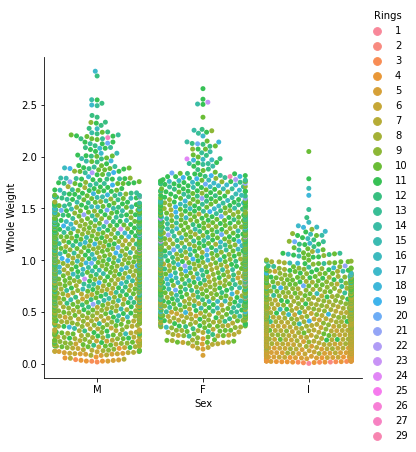

In [15]:
sns.catplot(data=abalone, x='Sex', y='Whole Weight', hue='Rings', kind='swarm')

sns.catplot() accepts height and aspect arguments. height=8 makes it taller, and aspect=2 makes it twice as wide as tall

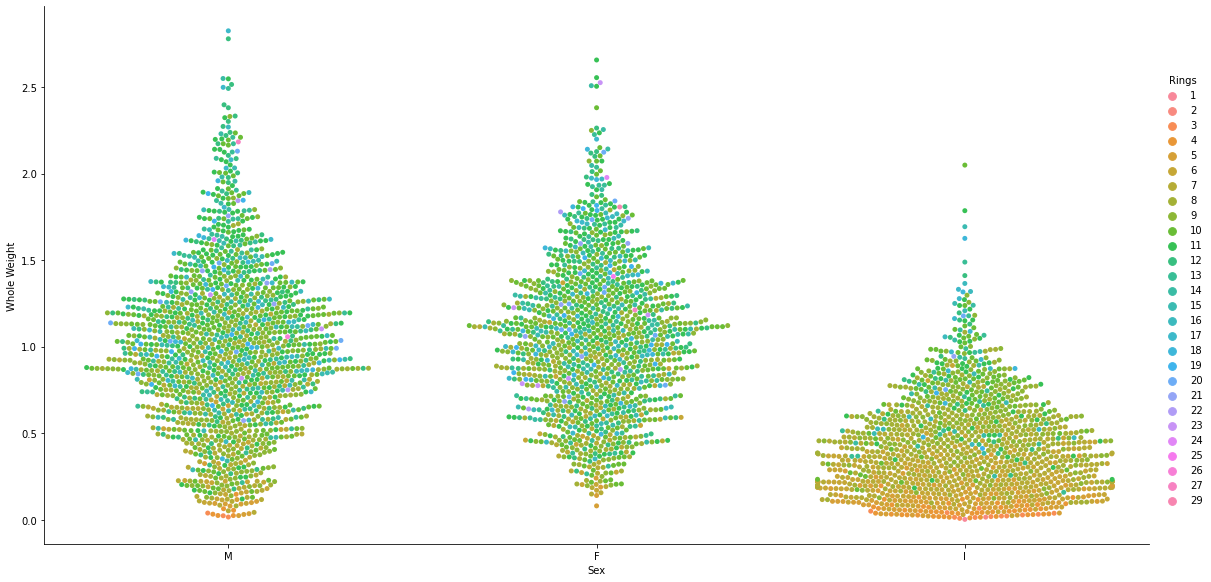

In [16]:
sns.catplot(data=abalone, x='Sex', y='Whole Weight', hue='Rings', kind='swarm', height=8, aspect=2)

While we're here, let's try some text and annotation

Text(1.5, 2.4, 'Doody')

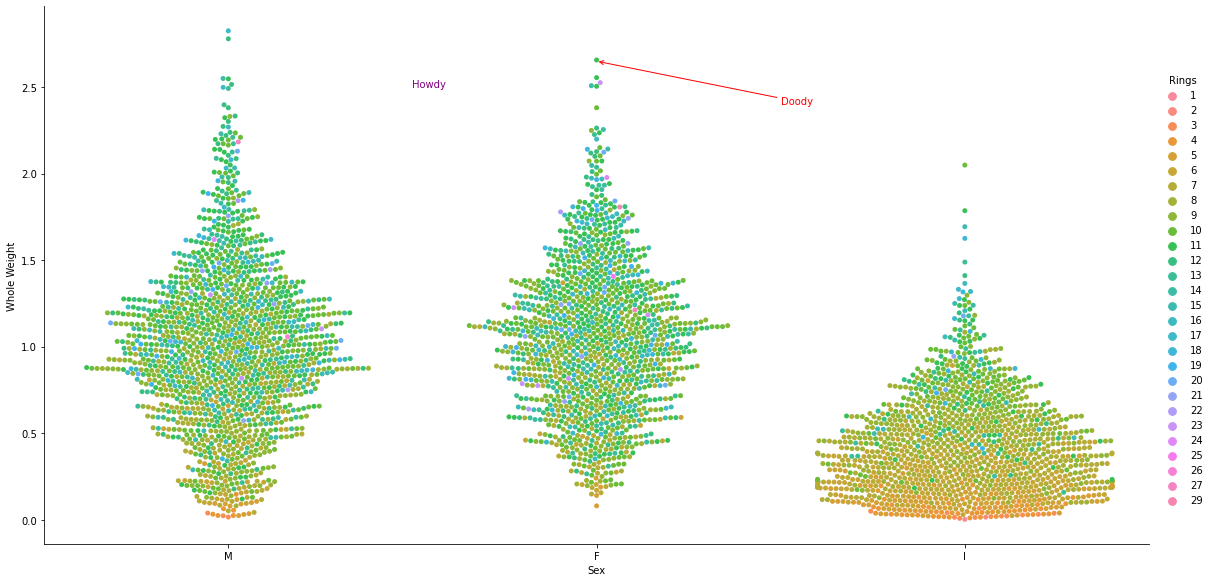

In [17]:
sns.catplot(data=abalone, x='Sex', y='Whole Weight', hue='Rings', kind='swarm', height=8, aspect=2)
a = plt.gca()
# Note that all the x values are relative to category ticks being at 0,1,2
a.text(0.5, 2.5, 'Howdy', color='purple')
a.annotate('Doody', xy=(1, 2.65), xytext=(1.5,2.4),
          color='r', arrowprops=dict(arrowstyle="->", color='r'))


# Linear Regression

Numpy can do that!

In [18]:
elec = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/electricity/electricity.csv')
elec

,Utility.Number,Utility.Name,Utility.State,Utility.Type,Demand.Summer Peak,Demand.Winter Peak,Sources.Generation,Sources.Purchased,Sources.Other,Sources.Total,...,Retail.Commercial.Customers,Retail.Industrial.Revenue,Retail.Industrial.Sales,Retail.Industrial.Customers,Retail.Transportation.Revenue,Retail.Transportation.Sales,Retail.Transportation.Customers,Retail.Total.Revenue,Retail.Total.Sales,Retail.Total.Customers
0,34,City of Abbeville - (SC),SC,Municipal,13.7,10.8,7000.0,59000.0,0.0,66000.0,...,460.0,0.0,0.0,0.0,0.0,0.0,0.0,7536.0,58000.0,3844.0
1,55,City of Aberdeen - (MS),MS,Municipal,32.4,30.3,0.0,209454.0,0.0,209454.0,...,662.0,5638.0,120537.0,1.0,0.0,0.0,0.0,14797.0,204261.0,3229.0
2,59,City of Abbeville - (LA),LA,Municipal,28.9,22.0,0.0,137264.0,0.0,137264.0,...,887.0,3011.1,35881.0,27.0,0.0,0.0,0.0,12383.0,127579.0,5494.0
3,84,A & N Electric Coop,VA,Cooperative,154.0,162.4,596.0,743457.0,0.0,744053.0,...,4227.0,15516.0,176162.0,8.0,0.0,0.0,0.0,78507.0,704010.0,35934.0
4,87,City of Ada - (MN),MN,Municipal,2.1,2.2,0.0,20028.0,0.0,20028.0,...,255.0,190.0,2615.0,58.0,0.0,0.0,0.0,1593.0,20028.0,1185.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,63169,Median Energy PA LLC,NJ,Retail Power Marketer,32.5,2.3,0.0,2102.0,0.0,2102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208.0,2102.0,329.0
3170,63232,"National Gas & Electric, LLC",TX,Retail Power Marketer,120.0,150.0,0.0,157024.0,0.0,157024.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17466.8,157024.0,14982.0
3171,63364,"Mirabito Power & Gas, LLC",NY,Retail Power Marketer,0.0,0.0,0.0,3886.0,0.0,3886.0,...,526.0,73.7,1440.0,351.0,0.0,0.0,0.0,184.3,3601.0,877.0
3172,63367,Commercial Energy of California,CA,Retail Power Marketer,0.0,0.0,0.0,88429.0,0.0,88429.0,...,134.0,0.0,0.0,0.0,0.0,0.0,0.0,4810.1,88429.0,134.0


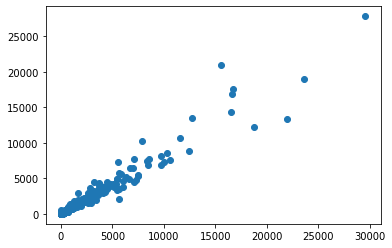

In [19]:
# These points look pretty linearly related
plt.scatter(elec['Demand.Summer Peak'], elec['Demand.Winter Peak'])

The x range goes out past 30000, but the y range only goes up to about 25000. If we were to graph a line with slope of 1, it would not fit this data

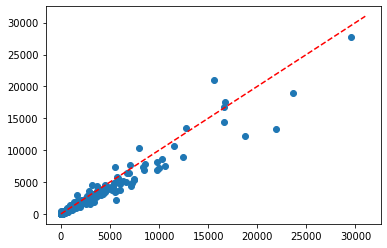

In [20]:
xrange = np.arange(0, 32000, 1000) # this is (0, 1000, 2000, ...31000) not 32k, because python
ax = plt.gca()
ax.scatter(elec['Demand.Summer Peak'], elec['Demand.Winter Peak'])
ax.plot(xrange, xrange, c='r', ls='--')

In [21]:
slope, inter = np.polyfit(elec['Demand.Summer Peak'], elec['Demand.Winter Peak'], 1) # 1 is for linear
slope, inter

(0.8627233728386638, 4.201972055376882)

In [22]:
slope*xrange + inter

array([4.20197206e+00, 8.66925345e+02, 1.72964872e+03, 2.59237209e+03,
       3.45509546e+03, 4.31781884e+03, 5.18054221e+03, 6.04326558e+03,
       6.90598895e+03, 7.76871233e+03, 8.63143570e+03, 9.49415907e+03,
       1.03568824e+04, 1.12196058e+04, 1.20823292e+04, 1.29450526e+04,
       1.38077759e+04, 1.46704993e+04, 1.55332227e+04, 1.63959461e+04,
       1.72586694e+04, 1.81213928e+04, 1.89841162e+04, 1.98468395e+04,
       2.07095629e+04, 2.15722863e+04, 2.24350097e+04, 2.32977330e+04,
       2.41604564e+04, 2.50231798e+04, 2.58859032e+04, 2.67486265e+04])

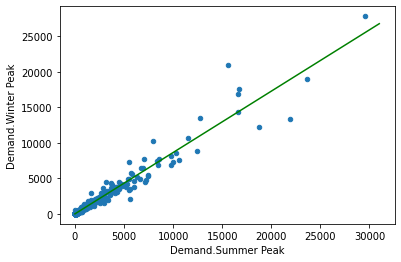

In [23]:
# Note that, rather than telling matplotlib to graph two pandas Series for you
# you can tell pandas to tell matplotlib to graph two Series for you
# Note ax= saves using an extra line for ax=plt.gca()
ax=elec.plot('Demand.Summer Peak', 'Demand.Winter Peak', # x and y column names, without elec[]
             kind='scatter')                             # kind of like seaborn
ax.plot(xrange, slope*xrange + inter, c='green')

# Grouping rows with common values

The electricity dataset has multiple power companies per state. It can be useful to aggregate into a per-state DataFrame

In [24]:
# Sometimes the reasonable way to groupby() is .sum()
elecStateSum = elec.groupby('Utility.State').sum()
elecStateSum.head()

,Utility.Number,Demand.Summer Peak,Demand.Winter Peak,Sources.Generation,Sources.Purchased,Sources.Other,Sources.Total,Uses.Retail,Uses.Resale,Uses.No Charge,...,Retail.Commercial.Customers,Retail.Industrial.Revenue,Retail.Industrial.Sales,Retail.Industrial.Customers,Retail.Transportation.Revenue,Retail.Transportation.Sales,Retail.Transportation.Customers,Retail.Total.Revenue,Retail.Total.Sales,Retail.Total.Customers
Utility.State,,,,,,,,,,,,,,,,,,,,,
AK,798254,884.4,1040.0,4773605.0,1630900.0,4057.0,6408562.0,5663820.0,357945.0,5417.0,...,51041.0,205159.4,1219513.0,982.0,0.0,0.0,0.0,1127761.3,5663820.0,331821.0
AL,648481,17748.1,16889.9,56870569.0,38910266.0,493402.0,96274237.0,82856055.0,8586822.0,20676.0,...,369679.0,1757567.6,27795487.0,7235.0,0.0,0.0,0.0,8445402.9,82856055.0,2625451.0
AR,358861,9718.5,8020.1,29182180.0,28465144.0,160932.0,57808256.0,45776200.0,9650417.0,39667.0,...,169876.0,927872.3,14858005.0,33811.0,48.8,416.0,2.0,3780196.8,45776200.0,1440947.0
AZ,894828,19878.1,13096.3,73048736.0,30143785.0,-103857.0,103088664.0,77491407.0,20636453.0,2824.0,...,329909.0,876102.9,13807586.0,8110.0,1079.1,11144.0,2.0,8148993.1,77491407.0,3280490.0
CA,2883679,71682.0,47382.5,96431385.0,244929801.0,-2152277.0,339208909.0,264801725.0,48279033.0,271912.0,...,2081530.0,6086711.9,54035057.0,164519.0,66974.4,1120095.0,13.0,43441886.9,331716319.0,19912271.0


In [25]:
# Sometimes (Demand.Summer.Peak ? ) max() may be more appropriate, or maybe sometimes mean()
elecStateMax = elec.groupby('Utility.State').max()
elecStateMax.head()

,Utility.Number,Utility.Name,Utility.Type,Demand.Summer Peak,Demand.Winter Peak,Sources.Generation,Sources.Purchased,Sources.Other,Sources.Total,Uses.Retail,...,Retail.Commercial.Customers,Retail.Industrial.Revenue,Retail.Industrial.Sales,Retail.Industrial.Customers,Retail.Transportation.Revenue,Retail.Transportation.Sales,Retail.Transportation.Customers,Retail.Total.Revenue,Retail.Total.Sales,Retail.Total.Customers
Utility.State,,,,,,,,,,,,,,,,,,,,,
AK,56739,Unalakleet Valley Elec Coop,Political Subdivision,172.0,213.0,1125455.0,477912.0,4521.0,1227505.0,1149793.0,...,9731.0,137350.9,761187.0,527.0,0.0,0.0,0.0,237555.7,1149793.0,81532.0
AL,40364,"Wiregrass Electric Coop, Inc",Municipal,11541.5,10711.7,56870569.0,8958721.0,493402.0,66322692.0,54152400.0,...,201106.0,1392733.0,22147839.0,6173.0,0.0,0.0,0.0,5500869.0,54152400.0,1488234.0
AR,50046,Woodruff Electric Coop Corp,Retail Power Marketer,4513.0,3620.0,27576017.0,4706187.0,162372.0,32438515.0,21818158.0,...,95844.0,517723.6,7758890.0,23141.0,35.0,292.0,1.0,1861402.8,21818158.0,713080.0
AZ,60914,Wellton-Mohawk Irr & Drain Dist,State,7250.0,4806.0,32896105.0,7156889.0,1452.0,37977736.0,28853719.0,...,132829.0,242751.0,4036768.0,3728.0,876.0,9539.0,1.0,3333394.0,28853719.0,1260386.0
CA,63367,Valley Clean Energy Alliance,Retail Power Marketer,21929.0,13352.0,33491087.0,56679822.0,41971.0,75665687.0,62259607.0,...,619752.0,2717660.0,19803824.0,91956.0,21823.5,408010.0,4.0,12799425.0,83611657.0,5524077.0


# More complicated grouping

There are multiple car makers from the same country, a new column can be put together to create a bulkier grouping than individual manufacturers

In [26]:
cars['Identification.Make'].value_counts()

Chevrolet             619
Ford                  602
GMC                   368
Toyota                325
Nissan                294
Dodge                 258
Cadillac              200
Honda                 200
Hyundai               187
Mazda                 168
Kia                   134
BMW                   133
Volkswagen            129
Jeep                  119
Subaru                105
Volvo                 103
Audi                   87
Infiniti               85
Buick                  71
Mercedes               64
MINI                   62
Saab                   59
BMW Motorrad           58
Lexus                  52
Suzuki                 51
Mitsubishi             51
Porsche                50
Grand Cherokee         48
Jaguar                 44
Lincoln                43
Aston Martin           43
Land Rover             35
Acura                  33
Chrysler               30
Mercury                28
Scion                  26
Maserati               12
Lotus                  11
Rolls-Royce 

In [27]:
# Set this first, EVERYBODY gets other, so after we set a bunch, we can see who we missed
cars['Country'] = 'Other'
cars['Country'].value_counts()

Other    5034
Name: Country, dtype: int64

In [28]:
# I put this on multiple lines just so you can see the important parts more clearly
cars.loc[ 
          cars['Identification.Make'].isin( ['Saab', 'Volvo'] ), 
          'Country' 
        ] = 'Sweden'

In [29]:
cars.loc[ cars['Identification.Make'].isin( ['Audi', 'BMW', 'Mercedes-Benz', 'Porsche', 'Volkswagen' ] ), 'Country' ] = 'Germany'

In [30]:
cars['Country'].value_counts()

Other      4466
Germany     406
Sweden      162
Name: Country, dtype: int64

In [31]:
# Check what's left over
leftovers = cars[ cars['Country'] == 'Other' ]
leftovers['Identification.Make'].value_counts()

Chevrolet             619
Ford                  602
GMC                   368
Toyota                325
Nissan                294
Dodge                 258
Cadillac              200
Honda                 200
Hyundai               187
Mazda                 168
Kia                   134
Jeep                  119
Subaru                105
Infiniti               85
Buick                  71
Mercedes               64
MINI                   62
BMW Motorrad           58
Lexus                  52
Suzuki                 51
Mitsubishi             51
Grand Cherokee         48
Jaguar                 44
Lincoln                43
Aston Martin           43
Land Rover             35
Acura                  33
Chrysler               30
Mercury                28
Scion                  26
Maserati               12
Lotus                  11
Rolls-Royce            10
AMG                     8
Chrysler Group LLC      6
Mercedes-AMG            5
Bentley                 5
Lamborghini             5
Ferrari     

# Making a function to graph lots of stuff

In [32]:
bball = pd.read_csv('https://raw.githubusercontent.com/RubeRad/tcscs/master/Kenpom_cbb_dataALL.csv')
bball.head()

,Unnamed: 0,Rk,Team,Conf,W - L,AdjEM,AdjO,AdjO Rank,AdjD,AdjD Rank,...,Luck Rank,AdjEM.1,AdjEM.1 Rank,OppO,OppO Rank,OppD,OppD Rank,AdjEM.2,AdjEM.2 Rank,Year
0,0,1,Kentucky,SEC,38-2,32.59,122.2,2.0,89.6,7.0,...,86.0,7.99,26.0,106.8,35.0,98.8,12.0,-1.06,189.0,2012
1,1,2,Ohio St.,B10,31-8,30.07,118.1,6.0,88.1,4.0,...,287.0,10.10,4.0,108.9,3.0,98.8,13.0,-3.34,253.0,2012
2,2,3,Michigan St.,B10,29-8,27.87,114.7,17.0,86.9,2.0,...,244.0,10.21,3.0,108.6,6.0,98.4,7.0,-1.07,190.0,2012
3,3,4,Kansas,B12,32-7,26.91,114.0,23.0,87.1,3.0,...,101.0,11.15,1.0,108.8,4.0,97.6,1.0,5.21,38.0,2012
4,4,5,Syracuse,BE,34-3,26.04,117.7,7.0,91.7,16.0,...,37.0,7.98,27.0,107.0,29.0,99.0,19.0,-2.11,216.0,2012


I expect this kind of code would get a bit repetitive, and cut&paste is never a good idea

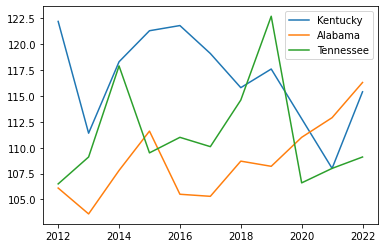

In [33]:
plt.figure()
axes=plt.gca()

kentacky = bball[ bball['Team'] == 'Kentucky']
kx = kentacky['Year']
ky = kentacky['AdjO']
axes.plot(kx, ky)

alababama = bball[ bball['Team'] == 'Alabama']
ax = alababama['Year']
ay = alababama['AdjO']
axes.plot(ax, ay)

tennesaw  = bball[ bball['Team'] == 'Tennessee']
tx = tennesaw['Year']
ty = tennesaw['AdjO']
axes.plot(tx, ty)

axes.legend(['Kentucky', 'Alabama', 'Tennessee'])

plt.show()


Better to make a function to do this kind of thing generically

In [34]:
def multi_plot(adf,        # a DataFrame
               scol_name,  # the name of the column we are selecting rows from
               scol_vals,  # the list of values we are selecting; one plot for each
               xcol_name,  # the name of the column to use for X in each plot
               ycol_name,  # the name of the column to use for Y in each plot
               color=None, # if you let this stay None, matplotlib will choose colors
               alpha=None, # if you let this stay None, alpha=opacity=1
               scatter=False, # default plot (line)
               axes=None   # if you don't pass axes in, axes for a new figure will be returned
              ):

    if axes == None:
      plt.figure()
      axes=plt.gca() 

    for val in scol_vals:
        # Grab a DataFrame of just the values we want from the selection column
        sub_df = adf[ adf[scol_name] == val ]
        
        # Grab the Series (columns) for X and Y
        xs = sub_df[xcol_name]
        ys = sub_df[ycol_name]
        
        # Plot these xs vs ys
        if scatter:
          axes.scatter(xs, ys, color=color, alpha=alpha)
        else:
          axes.plot(xs, ys, color=color, alpha=alpha)
            
    return axes # caller may want to graph more stuff, add titles, mess with range, etc etc
    

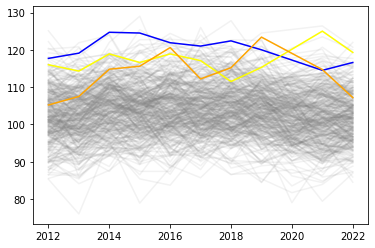

In [35]:
#good_teams = ['Duke', 'Kentucky','Baylor','Virginia','Gonzaga']
axes = multi_plot(bball, 'Team', bball['Team'].unique(), 'Year', 'AdjO', color='gray',   alpha=0.1)
axes = multi_plot(bball, 'Team', ['Duke'],               'Year', 'AdjO', color='blue',   axes=axes)
axes = multi_plot(bball, 'Team', ['Baylor'],             'Year', 'AdjO', color='yellow', axes=axes)
axes = multi_plot(bball, 'Team', ['Virginia'],           'Year', 'AdjO', color='orange', axes=axes)
#axes.legend( good_teams )